In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
wine = pd.read_csv(r'C:\Users\ppawa\Pranav\Study\Engineering\SEM 5\ML\Lab\ML-Labs\Red Wine Quality.csv')  
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


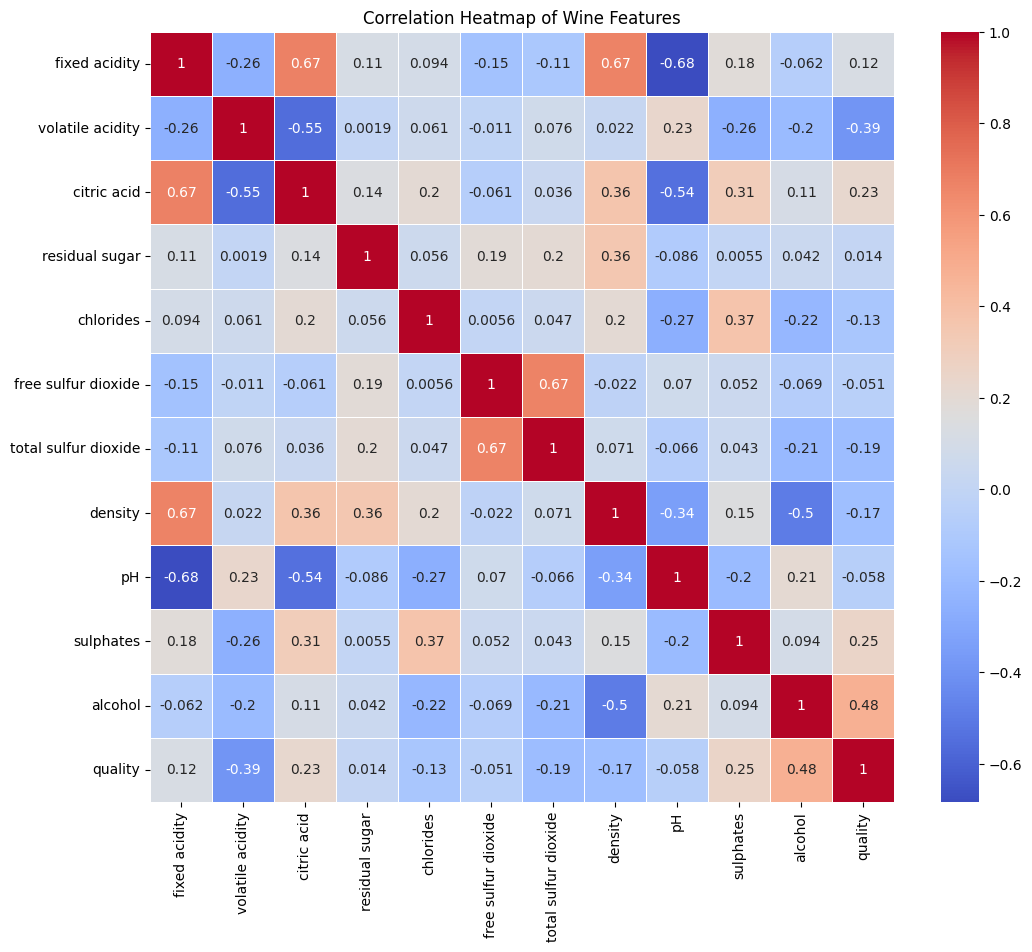

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Features')
plt.show()

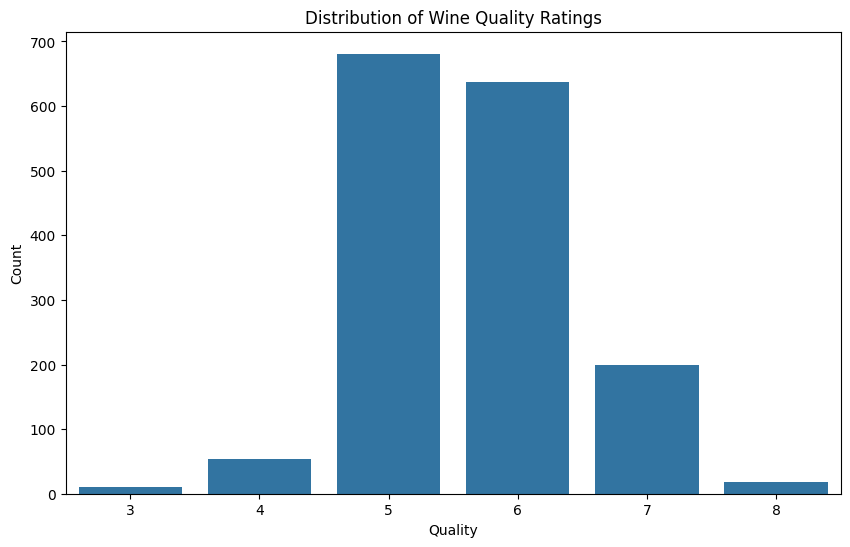

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

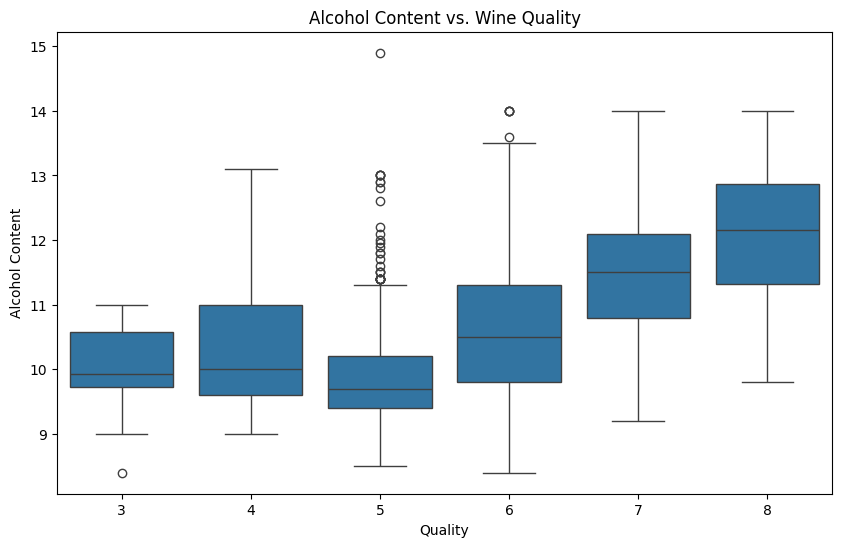

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=wine)
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

In [ ]:
X = wine[['volatile acidity']]
y = wine['quality']
y = y.apply(lambda x: 'Good' if x >= 6 else 'Bad')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.55      0.59      0.57       141
        Good       0.66      0.63      0.64       179

    accuracy                           0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320



In [14]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.6094
Precision: 0.6123
Recall: 0.6094
F1-score: 0.6104


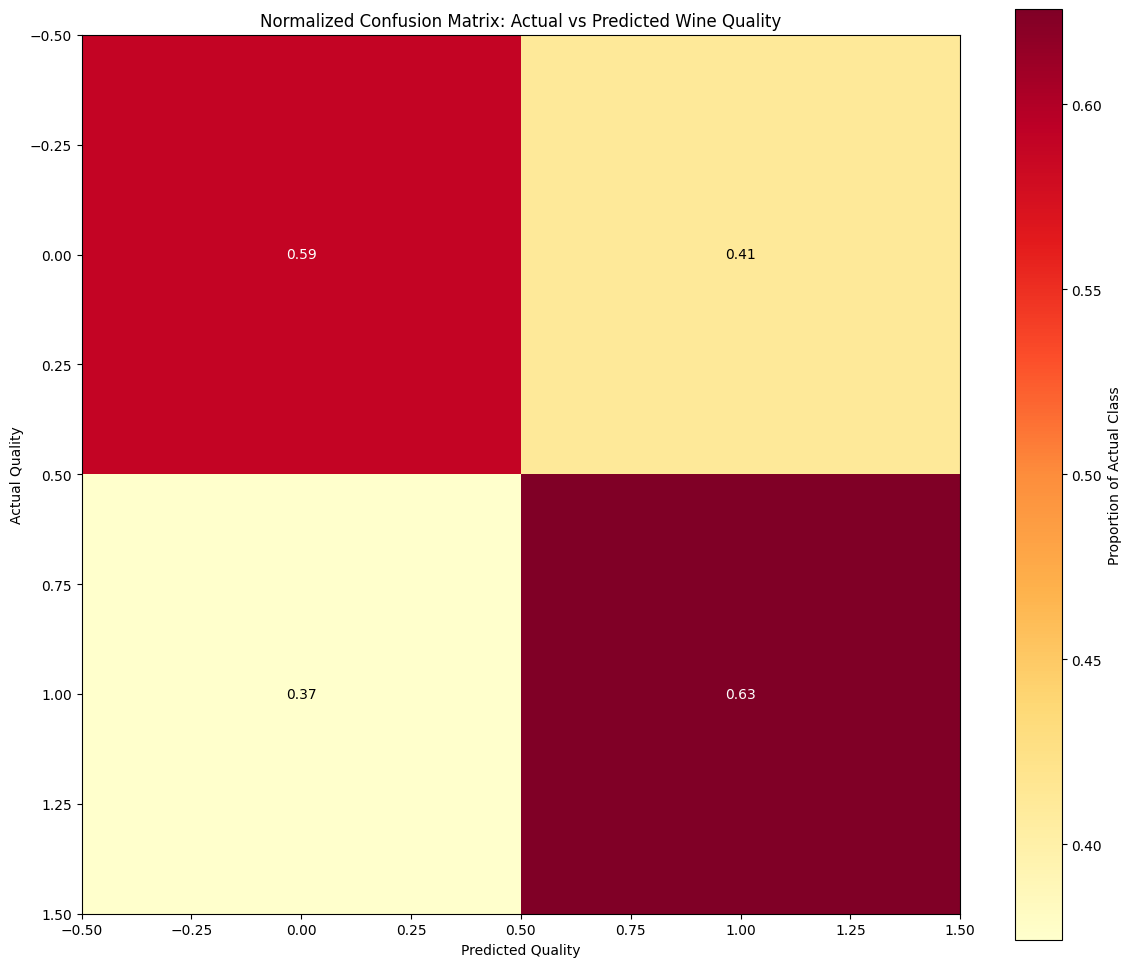

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 10))
im = plt.imshow(cm_norm, interpolation='nearest', cmap='YlOrRd')
plt.title('Normalized Confusion Matrix: Actual vs Predicted Wine Quality')
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.colorbar(im, label='Proportion of Actual Class')

for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        plt.text(j, i, f'{cm_norm[i, j]:.2f}', 
                 ha="center", va="center", 
                 color="white" if cm_norm[i, j] > 0.5 else "black")

plt.tight_layout()
plt.show()

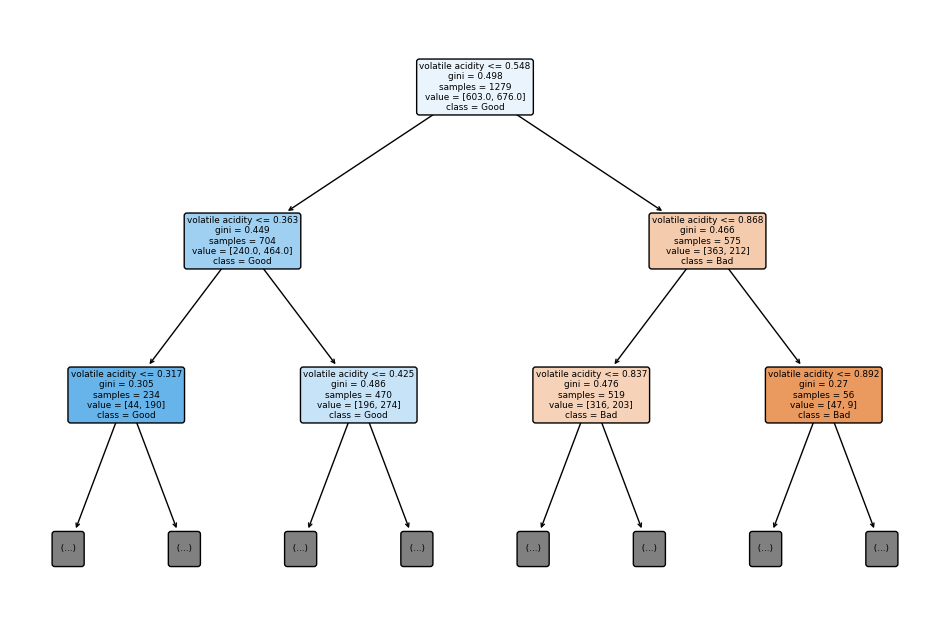

In [8]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['volatile acidity'], class_names=['Bad', 'Good'], rounded=True,max_depth=2)
plt.show()